## Assignment 8
## Gowri Govindaraj
## EP20BTECH11007

### Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
from astroML.correlation import bootstrap_two_point_angular

In [2]:
data = pd.read_csv('/Users/gowrigovindaraj/Documents/Class/Sem 6/DSA/A8/BCS05hr_reduced.txt', sep = '\s+')

In [3]:
data

,#RA,DEC,r-mag,spread_model,spread_model_err
0,76.709724,-56.091484,22.2622,0.113884,0.002812
1,77.430664,-56.090149,23.8355,0.186889,0.003559
2,76.937309,-56.092442,17.7021,0.000614,0.000120
3,77.344833,-56.089947,23.7293,0.117396,0.000751
4,77.416412,-56.089119,23.4456,0.192760,0.004764
...,...,...,...,...,...
49995,77.138313,-53.850994,16.4224,0.000928,0.004025
49996,76.861160,-53.846672,22.1385,0.076647,0.018807
49997,76.892189,-53.855347,20.5829,0.013071,-0.001716
49998,77.500732,-53.853760,20.7490,0.017413,-0.000761


In [4]:
data_sub = data[(data['r-mag'] > 17) & (data['r-mag'] < 20) & (data['spread_model'] > 0.002)]

In [5]:
def two_point_correlation(N):
    bins = 10 ** np.linspace(np.log10(1.0/60) , np.log10(1) , 16)
    results = [bins]
    for d in [data]:
        results += bootstrap_two_point_angular(data_sub["#RA"] , data_sub["DEC"] , bins = bins, method = "landy-szalay" , Nbootstraps = 100)
    return results

bins, b_corr, b_corr_err, b_bs = two_point_correlation(10)

bin_centers = []
for idx in range(len(bins)-1):
    bin_centers.append((bins[idx] + bins[idx+1])/2)

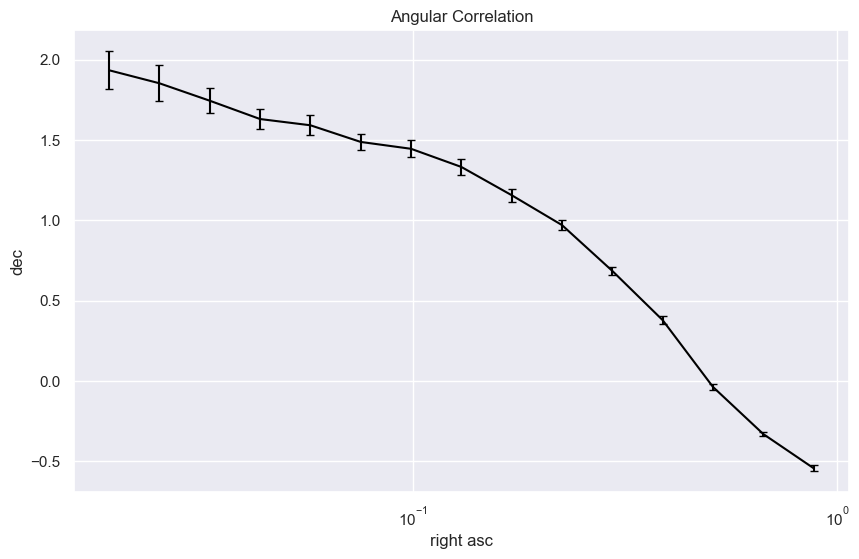

In [6]:
plt.figure(figsize = (10,6))
plt.xscale('log')
plt.yscale('linear')
plt.errorbar(bin_centers , b_corr , yerr = b_corr_err, capsize = 3,color = 'black')
plt.title("Angular Correlation")
plt.xlabel("right asc") 
plt.ylabel("dec") 
plt.show()